# Gaussian Mixture models


- ### There is a generalized family of distributions called Gaussian Mixture Models GMMs (simply a sum of Gaussians), with a $pdf$ given by:

\begin{equation}
p(x) = \sum_{i=1}^{K} w_i \mathbb{N}(x|\mu_i, \sigma_i)
\end{equation}

Where:
1. $K$: is the number of Gaussians
2. $\mu_i, \sigma_i$: are the parameters of each Gaussian
3. $w_i$: is the coefficient (weight) of each Gaussian (mode)
<br>

- ### In order for the GMM to be a distribution the coefficents $w_i$, must sum to one:

\begin{equation}
\sum_{i=1}^{K}w_i = 1
\end{equation}

![Subdirectory Image](https://github.com/gtsagkatakis/Data-Science-and-Applications/blob/ee5a8decd5ca7b22312e1a34868526ea6c76b392/Images/gmm.png?raw=true')


<br><br>

## You are given a GMM model consisting of 3 Gaussians: $\mathbb{N}_1(0, 1), \mathbb{N}_2(-2, 0.5), \mathbb{N}_3(3, 2),$

1. #### Compute the $pdf$ of the GMM analytically using the libraries desribed above and plot the actual $pdfs$.
2. #### Assuming we are given the GMM model, sample from our model using the method we described above in a two-step way.
    First flip a $K$ sided coin to decide from which mode (Gaussian) we are sampling from

    Then, use the exact same trick we had above to samples from the specific Gaussian

    Plot the actual GMMs and the histogram of your samples for different sample sizes (e.g. $100, 1000, 10000$)

    Show that the histogram converges to the actual distribution


In [10]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import random


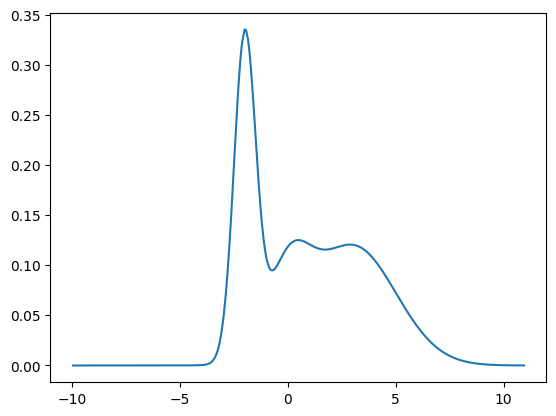

In [11]:

# weights
W = [0.2, 0.4, 0.6]

# distributions
N1 = lambda x: norm.pdf(x, 0, 1)
N2 = lambda x: norm.pdf(x, -2, 0.5)
N3 = lambda x: norm.pdf(x, 3, 2)

# pdf
f = lambda x: W[0] * N1(x) + W[1] * N2(x) + W[2] * N3(x)
'''i use scipy's stats.norm for normal distr pdf'''

# points
minMean = -2
maxMean = 3
maxSdeviation = 2
x = np.linspace(minMean - 4*maxSdeviation, maxMean + 4*maxSdeviation, 1000)

# sampling to show the GMM pdf
points=[]
sample=[]
k=1000
for i in range(k):
  p = random.choice(x)
  points.append(p)
  sample.append(f(p))


sorted_points, sorted_sample = zip(*sorted(zip(points, sample)))
plt.plot(sorted_points, sorted_sample)
plt.show()

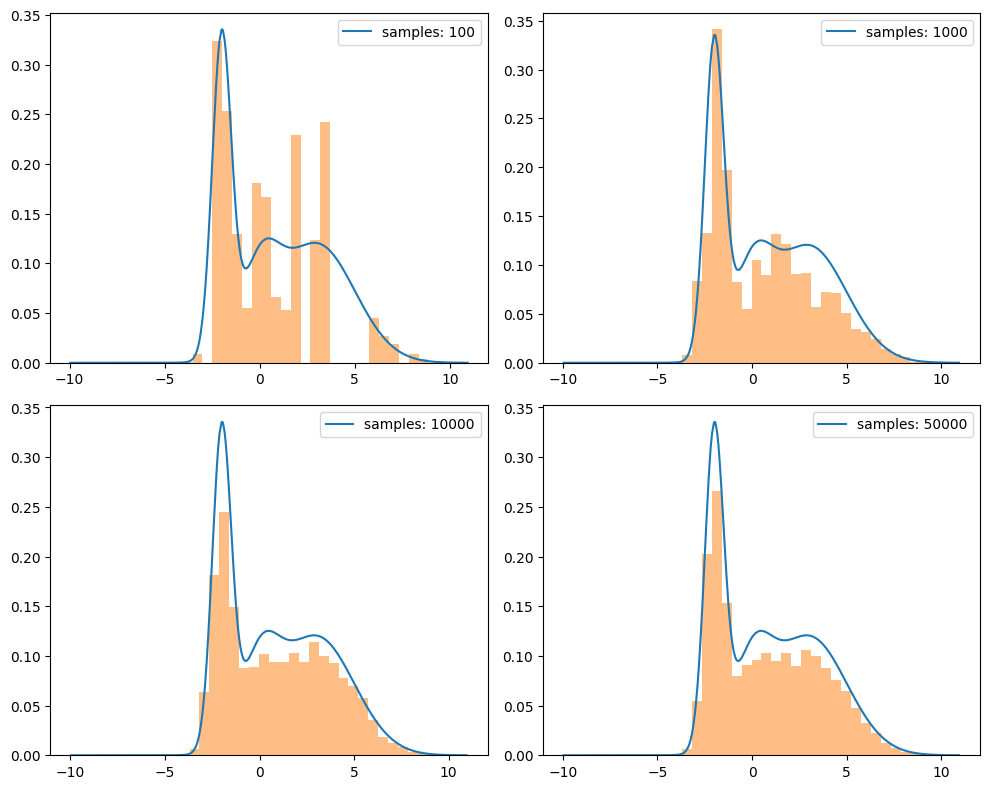

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

gaussians = [N1, N2, N3]
sample_num = [100, 1000, 10000, 50000]
plotNum = 0
for n in sample_num:
  points = []
  sample = []
  for i in range(n):
    choice = random.choice([0,1,2])
    p = random.choice(x)
    points.append(p)
    sample.append(W[choice] * gaussians[choice](p))



  axes[plotNum].plot(sorted_points, sorted_sample, label=f'samples: {n}')
  axes[plotNum].hist(points, bins=40, weights=sample, density=True, alpha=0.5)
  axes[plotNum].legend()
  plotNum += 1


plt.tight_layout()
plt.show()

---
- #### Use the sklearn Breast Cancer Dataset we used and pick a different feature to analyze that you think is likely to be generated from an underlying Gaussian.

- #### That means you will be assuming that the distribution of the feature you choose is coming from a Gaussian parametrized by the vector:

\begin{equation}
\vec{\theta} = [\mu, \sigma]
\end{equation}

- #### Plot the Histogram of you feature, and the 0.05, 0.25, 0.5, 0.75, 0.95 p-values

- #### Calculate the mean and the std esimates of your feature vector

- #### Use the Maximum Likelihood Estimation we saw before to estimate the parameter vector and thus the Gaussian that best describes the feature vector you selected.

- #### One can easily estimate the Gaussian without the Maximum Likelihood Estimation by simply using the mean and std estimates we saw earlier. Use this simple derivation to compare against the MLE solution. These two should be the same

#### **Hints:** In this case you will have a function of both $\mu$ and $\sigma$. Get the partial derivatives of each one and set them to zero.


In [13]:

from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt


data = load_breast_cancer(as_frame=True).data

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


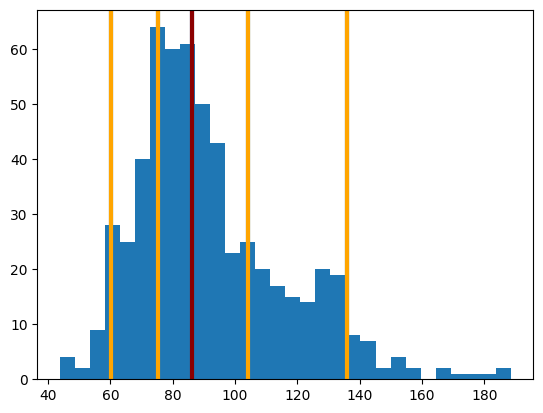

In [14]:
#select feature vector and plot quantiles

vec = data['mean perimeter'].values
vec_sorted = np.sort(vec)

plt.hist(vec, bins=30)

pQ = [0.05, 0.25, 0.5, 0.75, 0.95]
for p in pQ:
  p_est = vec_sorted[int(p * len(vec))]
  plt.axvline(p_est, linewidth=3)

  col = "orange"
  if p==0.5: col = "darkred"
  plt.axvline(p_est, color=col, linewidth=3)

plt.show()

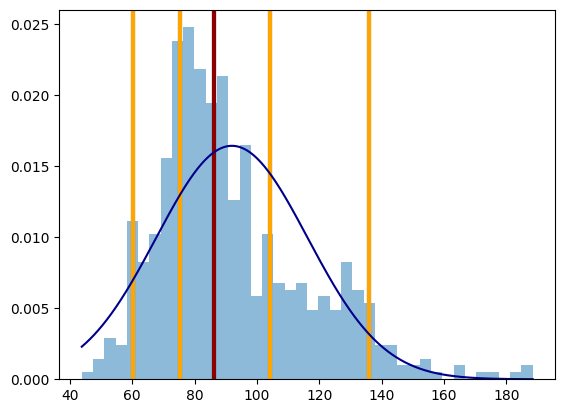

In [15]:
# derive the Gaussian estimate by simply using the mean and std estimates and plot them against the histogram
vec = data['mean perimeter'].values
vec_sorted = np.sort(vec)

mu = np.sum(vec) / len(vec)
std = np.sqrt((np.sum(np.power(vec - mu, 2))) / len(vec))
y = lambda x: norm.pdf(x, mu, std)

plt.hist(vec, bins=40, density='True', alpha = .5)

pQ = [0.05, 0.25, 0.5, 0.75, 0.95]
for p in pQ:
  p_est = vec_sorted[int(p * len(vec))]
  plt.axvline(p_est, linewidth=3)

  col = "orange"
  if p==0.5: col = "darkred"
  plt.axvline(p_est, color=col, linewidth=3)

x_vals = np.linspace(np.min(vec), np.max(vec), 1000)

plt.plot(x_vals, y(x_vals), color='darkblue')
plt.show()


normal distribution with parameters $\mu$ (mean) and $\sigma^2$ (variance).
The pdf of the normal distribution is given by:
 $f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) $

Assume we have a random sample $X_1, X_2, \ldots, X_n$ from this distribution.
The likelihood function is:
$ L(\mu, \sigma^2; X_1, X_2, \ldots, X_n) =
\prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(X_i-\mu)^2}{2\sigma^2}\right) $

Lets work with the log-likelihood function:
$ \ell(\mu, \sigma^2; X_1, X_2, \ldots, X_n) =
\sum_{i=1}^{n} \left[ -\frac{1}{2} \log(2\pi\sigma^2) - \frac{(X_i-\mu)^2}{2\sigma^2} \right] $

We take the partial derivative with respect to $\mu$ and then $\sigma^2$ and set it to zero, to find the max:
$\frac{\partial \ell}{\partial \mu} = \sum_{i=1}^{n} \frac{X_i - \mu}{\sigma^2} = 0 \implies \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i$

$\frac{\partial \ell}{\partial (\sigma^2)} = \sum_{i=1}^{n} \left[ -\frac{1}{2\sigma^2} + \frac{(X_i - \mu)^2}{2(\sigma^2)^2} \right] = 0 \implies \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{\mu})^2$

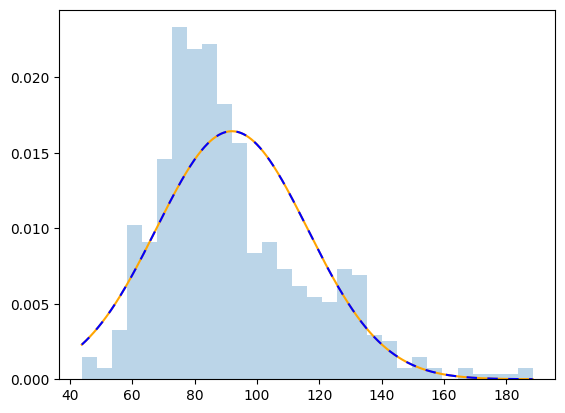

In [16]:
# Use the Maximum Likelihood Estimation (MLE) method to estimate the mean and std. Plot the new estimated Gaussian against the previous and the histogram (They should be the same)
mu_MLE = np.sum(vec) / len(vec)
std_MLE = np.sqrt((np.sum(np.power(vec - mu, 2))) / len(vec))
y2 = lambda x: norm.pdf(x, mu_MLE, std_MLE)

plt.hist(vec, bins=30, alpha=.3, density=True)
plt.plot(x_vals, y(x_vals), color='orange')
plt.plot(x_vals, y2(x_vals), color='blue', linestyle=(0,(5,5)))
plt.show()

The formulas for the MLE estimators for the parameters are the exact same as in the code above, so the new Gaussian is the same as the previous

# this particular feature is better explained using mixture models